In [1]:
##################
## Counting Acc ##
##################
import json
import os
import xlrd
import numpy as np
import matplotlib.pyplot as plt
# result path
load_path='/cis/home/lhuang/my_documents/Cytometry/CenterTrack/exp/tracking/cell_tracking1/centerT/'
load_path1='/cis/home/lhuang/my_documents/Cytometry/CenterTrack/exp/tracking/cell_tracking1/'
paths=os.listdir(load_path1)
# Load GT
GT_path = [p for p in paths if '.xlsx'in p][0]
GT=xlrd.open_workbook(os.path.join(load_path1,GT_path)).sheets()[0]
fnames=GT.col_values(0)
RBC_GT=GT.col_values(7)
WBC_GT=GT.col_values(8)
P_GT=GT.col_values(9)
names=[f for i,f in enumerate(fnames) if '.tif' in f]
names_ind=[i for i,f in enumerate(fnames) if '.tif' in f]
fnums_GT=[f.split('.')[0].split('_')[-1] for f in names]
print(fnums_GT)
#print(names,names_ind)
GTs={}
for name,inds in zip(fnums_GT, names_ind):
    GTs.update({name:np.stack([RBC_GT[inds:inds+20],WBC_GT[inds:inds+20],P_GT[inds:inds+20]])})

['3', '3@0001', '4', '4@0001', '5', '5@0001', '6', '6@0001', '7', '7@0001', '8', '8@0001', '9', '9@0001', '10', '10@0001']


['save_results_cell_tracking1_10.json', 'save_results_cell_tracking1_3.json', 'save_results_cell_tracking1_3@0001.json', 'save_results_cell_tracking1_7@0001.json', 'save_results_cell_tracking1_8.json', 'save_results_cell_tracking1_8@0001.json', 'save_results_cell_tracking1_9.json', 'save_results_cell_tracking1_9@0001.json']
LOADING: /cis/home/lhuang/my_documents/Cytometry/CenterTrack/exp/tracking/cell_tracking1/centerT/save_results_cell_tracking1_10.json
LOADING: /cis/home/lhuang/my_documents/Cytometry/CenterTrack/exp/tracking/cell_tracking1/centerT/save_results_cell_tracking1_3.json


/cis/home/lhuang/anaconda3/envs/CenterTrackENV/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in true_divide
/cis/home/lhuang/anaconda3/envs/CenterTrackENV/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in true_divide


LOADING: /cis/home/lhuang/my_documents/Cytometry/CenterTrack/exp/tracking/cell_tracking1/centerT/save_results_cell_tracking1_3@0001.json
LOADING: /cis/home/lhuang/my_documents/Cytometry/CenterTrack/exp/tracking/cell_tracking1/centerT/save_results_cell_tracking1_7@0001.json
LOADING: /cis/home/lhuang/my_documents/Cytometry/CenterTrack/exp/tracking/cell_tracking1/centerT/save_results_cell_tracking1_8.json
LOADING: /cis/home/lhuang/my_documents/Cytometry/CenterTrack/exp/tracking/cell_tracking1/centerT/save_results_cell_tracking1_8@0001.json
LOADING: /cis/home/lhuang/my_documents/Cytometry/CenterTrack/exp/tracking/cell_tracking1/centerT/save_results_cell_tracking1_9.json


/cis/home/lhuang/anaconda3/envs/CenterTrackENV/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in true_divide
/cis/home/lhuang/anaconda3/envs/CenterTrackENV/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in true_divide
/cis/home/lhuang/anaconda3/envs/CenterTrackENV/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in true_divide
/cis/home/lhuang/anaconda3/envs/CenterTrackENV/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in true_divide
/cis/home/lhuang/anaconda3/envs/CenterTrackENV/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in true_divide
/cis/home/lhuang/anaconda3/envs/CenterTrackENV/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in true_divide


LOADING: /cis/home/lhuang/my_documents/Cytometry/CenterTrack/exp/tracking/cell_tracking1/centerT/save_results_cell_tracking1_9@0001.json
1.0185633918296877 1.008143763100586


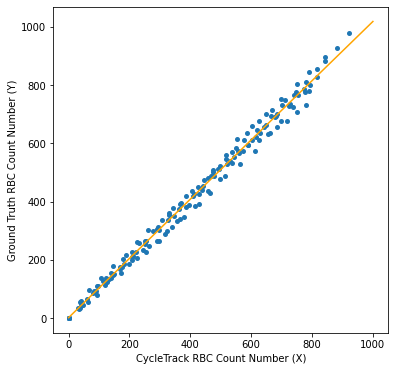

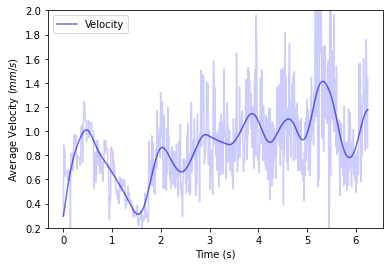

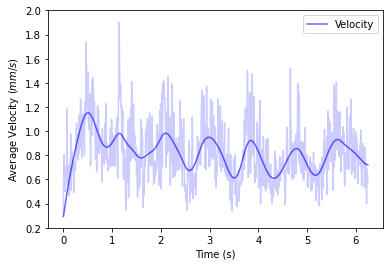

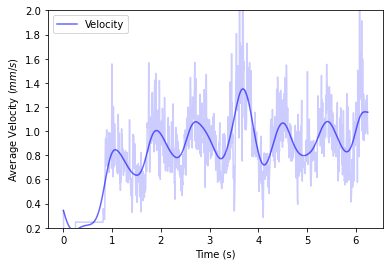

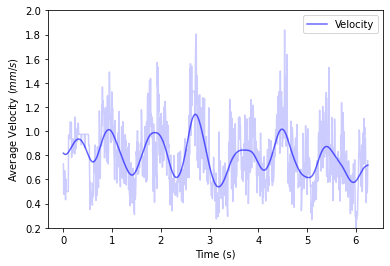

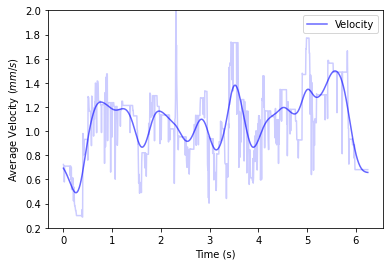

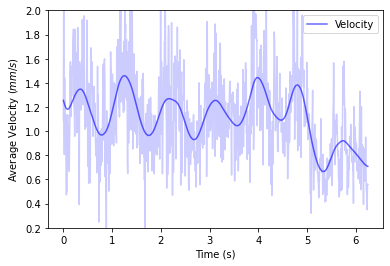

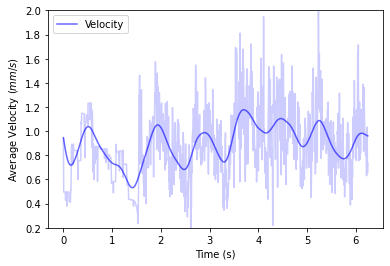

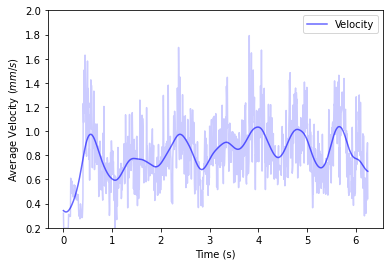

In [5]:
from scipy import fftpack
from scipy import signal
# Load predictions
paths_pred=[p for p in paths if 'save_results_cell_tracking1'in p]
paths_pred.sort()
print(paths_pred)
Errors=[]
countss=[]
GTss=[]
fnums_pred=[f.split('.')[0].split('_')[-1] for f in paths_pred]
f2=plt.figure(figsize=(6,6))
ax21=f2.add_subplot(111)
Errors_50=[]
VELs=[]
#file_inds=[1,3,6,7]
ord=0
times1=np.arange(0,1000)/160.
times2=np.arange(0,1001,50)/160.
for file_index in range(len(paths_pred)):
#for file_index in file_inds:
    ord += 1
    fname_pred=os.path.join(load_path,paths_pred[file_index])
    print('LOADING:',fname_pred)
    vel_path='velocity_cell_tracking1_'+fnums_pred[file_index]+'.json'
    #vel_path='velocity_cell_tracking1_'+fnums_pred[3]+'.json'
    with open(os.path.join(load_path,vel_path), 'r') as f:
        vels = json.load(f)
    with open(fname_pred, 'r') as f:
        ret = json.load(f)
    #plt.plot(vel['velocity'])
    #plt.show()
    vels=np.array(vels['velocity'])
    vels=vels * 416. / 1280. * 160. /1000.
    #vels=vels-np.mean(vels)
    b, a = signal.butter(2, 0.02)
    vels_f = signal.filtfilt(b, a, vels)
    GT=GTs[fnums_pred[file_index]]
    RBC=GT[0]
    WBC=GT[1]
    P=GT[2]
    frames=np.arange(0,1001,50)
    frames1=np.arange(49,1000,50)
    counts=[0]
    GT_counts_50=np.concatenate([[0],RBC+P])
    GT_counts=np.concatenate([[0],np.cumsum(RBC+P)])
    for frame in range(0,1000):
        result=ret['{}'.format(frame)]
        #vel=np.array([r['tracking']for r in result])
        #if len(result)>0:
            #vel=np.mean(np.square(vel[:,0]**2+vel[:,1]**2))
            #vels.append(vel)
        if len(result)>0 and frame in frames1:
            trk_ids=[r['tracking_id']for r in result]
            counts.append(np.max(trk_ids))
    ## ERROR
    counts_50=np.concatenate([[0],np.diff(counts)])
    Error_50 = abs(counts_50-GT_counts_50)
    Error_abs = abs(counts-GT_counts)
    Error_prc = Error_abs / GT_counts *100
    Errors.append(Error_prc)
    #plt.plot(vels)
    #plt.show()
    #f1=plt.subplot(2,2,ord)
    f1=plt.figure()
    #plt.title('Prediction vs. Ground Truth')
    #ax1=f1.add_subplot(111)
    ax2=f1.add_subplot(111)
    #ax2 = ax1.twinx()
    #P=ax1.plot(times2,Error_50/2,'green',label='Absolute error')
    #ax1.set_ylim([0,12])
    #ax1.plot((0,1000),(0,0),ls='-.')
    Errors_50.append(Error_50[1:])
    VELs.append(vels[1::50])
    countss.append(counts)
    GTss.append(GT_counts)
    #color=P[0].get_color()
    #ax1.plot(frames,GT_counts,label='GT',color=color)
    #ax1.plot(frames,GT_counts,label='Ground Truth')
    #ax1.plot(frames,Error_abs,label='Error',color='gray')
    ax2.plot(times1,vels,'blue',alpha=0.2)
    ax2.plot(times1,vels_f,'blue',alpha=0.6,label='Velocity')
    ax2.set_ylim([0.2,2.0])
    #lines, labels = ax1.get_legend_handles_labels()
    #lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend()
    #ax1.legend(lines + lines2, labels + labels2)
    ax2.set_xlabel('Time (s)')
    #ax1.set_ylabel('Counting Error for thr past 50 frames')
    ax2.set_ylabel('Average Velocity ($mm/s$)')#Average Velocity
import pylab
countss=np.concatenate(countss)
GTss=np.concatenate(GTss)
m,b = pylab.polyfit(countss, GTss, 1)
print(m,b)
ax21.scatter(countss,GTss,marker='.',linewidths=2.0)
ax21.plot([0,1000],[b,1000*m],'orange')
ax21.set_xlabel('CycleTrack RBC Count Number (X)')
ax21.set_ylabel('Ground Truth RBC Count Number (Y)')
plt.show()
Errors=np.stack(Errors)

In [26]:
x_mean=np.mean(countss)
y_mean=np.mean(GTss)
x_std=np.std(countss)
y_std=np.std(GTss)
z_x=(countss-x_mean)/x_std
z_y=(GTss-y_mean)/y_std
np.sum(z_x*z_y)/(len(countss))

0.9959535426859863

[array([18.,  5.,  9.,  1., 18., 15.,  6.,  9.,  4.,  9.,  8.,  3., 16.,
        0., 10.,  2., 23., 29.,  4., 13.]), array([ 1., 16.,  2.,  7.,  3.,  5.,  3.,  2.,  8.,  8.,  6.,  9.,  1.,
        3., 20., 10.,  3., 13.,  3.,  3.]), array([ 1.,  4.,  5.,  3., 11.,  2.,  1.,  7.,  8., 15.,  5.,  3.,  1.,
       10.,  9.,  7.,  0.,  9.,  6.,  7.]), array([19., 11.,  2.,  1.,  8., 13.,  3., 11.,  4.,  2.,  7.,  2.,  2.,
        5., 17.,  1.,  4.,  6., 11., 20.]), array([ 4.,  8.,  9., 15.,  5.,  4., 21.,  3.,  5.,  0., 12.,  1., 19.,
        4.,  5.,  7.,  5., 12.,  7.,  0.]), array([ 4.,  4.,  4.,  5.,  5., 13.,  1.,  6.,  8.,  0.,  3.,  0., 18.,
        8.,  7.,  2.,  4.,  5.,  4.,  1.]), array([ 7.,  4.,  5.,  4.,  1.,  2.,  7.,  4.,  3.,  2.,  1., 24., 10.,
       15.,  3.,  6.,  5.,  1.,  0.,  0.]), array([ 0.,  0.,  1.,  5., 12.,  5., 10.,  2.,  9.,  0., 26.,  4.,  8.,
        2.,  8.,  0.,  1.,  2.,  5.,  6.])] [array([0.88669756, 0.78104404, 0.81737078, 0.2659844 , 0.59500877,
   

-0.05880363751220704

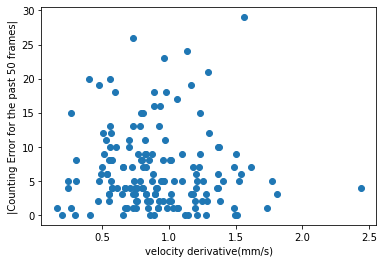

In [89]:
Err50=np.array(Errors_50)
#Err50=Err50/np.max(Err50,axis=0)
Err50=np.concatenate(Err50)
V50=np.concatenate(VELs)
print(Errors_50,VELs)
ind=3
#plt.scatter(VELs[ind],Errors_50[ind])
plt.scatter(np.abs(V50),Err50)
plt.xlabel('velocity derivative(mm/s)')
plt.ylabel('|Counting Error for the past 50 frames|')

V50=VELs[ind]
Err50=Errors_50[ind]
x_mean=np.mean(Err50)
y_mean=np.mean(V50)
x_std=np.std(Err50)
y_std=np.std(V50)
z_x=(Err50-x_mean)/x_std
z_y=(V50-y_mean)/y_std
np.sum(z_x*z_y)/(len(countss))

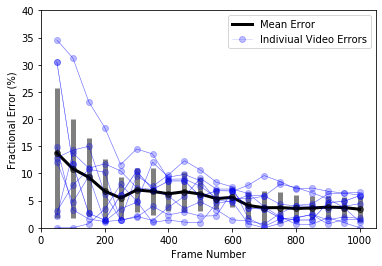

[[         nan  69.49152542  88.28828829  97.36842105  98.57142857
   93.9516129   89.54703833  92.96187683  91.38381201  91.37529138
   94.23868313  93.18181818  93.2173913   96.36650869  96.59259259
   98.20936639  98.58611825  98.54897219  95.36199095  95.14038877
   94.06952965]
 [         nan  97.77777778  86.23853211  89.03225806  88.23529412
   89.53488372  92.61744966  92.95774648  94.16243655  96.48711944
   95.21829522  96.67318982  98.51301115  98.76760563  99.32546374
   97.37704918  95.90551181  95.58599696  93.78698225  93.62606232
   93.45156889]
 [         nan  96.96969697  92.1875      89.24731183  89.76377953
   98.63945578  97.86096257  98.66666667  96.19771863  94.21221865
   90.8839779   92.87531807  92.87356322  93.68421053  96.08610568
   98.01444043  99.32546374  99.36908517  98.11594203  99.04632153
  100.        ]
 [         nan  65.45454545  68.75        76.8115942   81.56424581
   88.37209302  85.49618321  86.42384106  91.07142857  91.00529101
   92.34449761

In [4]:
plt.figure(2)
e=np.std(Errors,axis=0)
Errors1=np.mean(Errors,axis=0)
plt.errorbar(frames,Errors1,e,color='black',fmt='-o',elinewidth=5,alpha=0.5)
plt.plot(frames,Errors1,lw=3,color='black',label='Mean Error')
#plt.plot(frames,Errors.T,'p',alpha=0.25,color='blue')
plt.plot(frames,Errors.T[:,0],'-o',alpha=0.25,color='blue',lw=0.5,label='Indiviual Video Errors')
plt.plot(frames,Errors.T[:,0:],'-o',alpha=0.25,color='blue',lw=0.5)
plt.plot(frames,Errors.T,alpha=0.5,color='blue',lw=0.5)
plt.legend()
#plt.title('Errors VS Frame')
plt.ylabel('Fractional Error (%)')
plt.xlabel('Frame Number')
plt.ylim(0,40)
plt.xlim(0,1050)
plt.show()
print(100-Errors)
#print(e)


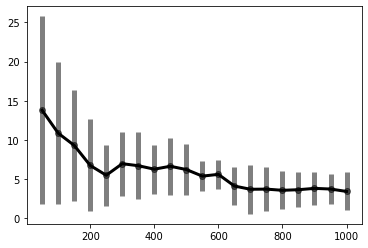

In [15]:
plt.errorbar(frames,Errors,e,color='black',fmt='-o',elinewidth=5,alpha=0.5)
plt.plot(frames,Errors,alpha=1.0,lw=3,color='black',label='Mean Error')
plt.show()

In [3]:
## MOT Metrics
import motmetrics as mm
import numpy as np
import json
import os

# import GT
load_path_GT='/cis/home/lhuang/my_documents/Cytometry/CenterTrack/data/CellTracking/'
dataset='train_new_1'
load_path_GT=os.path.join(load_path_GT,dataset)
GT_path=os.path.join(load_path_GT,'celldata.json')
with open(GT_path, 'r') as f:
        GT = json.load(f)        
#print(GT.keys())
fnums_GT = np.unique([v['file_name'].split('.')[0].split('_')[-1] for v in GT['videos']])
print(fnums_GT)

# result path
#load_path_pred='/cis/home/lhuang/my_documents/Cytometry/CenterTrack/exp/tracking/cell_tracking1/centerT/'
load_path_pred='/cis/home/lhuang/my_documents/Cytometry/CenterTrack/exp/tracking/cell_tracking1/'
paths=os.listdir(load_path_pred)
# Load prediction
paths_pred=[p for p in paths if 'save_results_cell_tracking1'in p]
paths_pred.sort()
fnums_pred=[f.split('.')[0].split('_')[-1] for f in paths_pred]
fname_pred=os.path.join(load_path_pred,paths_pred[file_index])
print(fnums_pred)

def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

fnums_eval=intersection(fnums_GT, fnums_pred)
print(fnums_eval)

['3' '3@0001' '4@0001' '5' '6']
['10', '3', '3@0001', '7@0001', '8', '8@0001', '9', '9@0001']
['3', '3@0001']


In [126]:
def find_GT(GT,file_num,frame_id):
    video_id = [v['id'] for v in GT['videos'] if v['file_name'].split('.')[0].split('_')[-1]==file_num]
    #print(video_id)
    if len(video_id)==0:
        print('Ground Truth Not Found for file', fnum_pred) 
        return 0,0
    for vid in video_id:
        image_ids = np.array([v['id'] for v in GT['images'] if v['video_id']==vid])
        frame_ids = np.array([v['frame_id'] for v in GT['images'] if v['video_id']==vid])
        #image_id = image_ids[np.where(frame_ids==frame_id)]
        #print(image_ids)
        #print(frame_ids)
        image_id = image_ids[frame_ids==frame_id]
        if len(image_id)==0:
             continue
        else:
            track_id = [v['track_id'] for v in GT['annotations'] if v['image_id'] in (image_id)]
            if len(track_id)>0:
                track_cts = np.array([v['bbox'] for v in GT['annotations'] if v['image_id'] in (image_id)])
                track_cts = np.array([track_cts[:,0]+track_cts[:,2],track_cts[:,1]+track_cts[:,3]]).T
                return track_id,track_cts
    print('Ground Truth Not Found for frame', frame_id) 
    return 0,0

def find_pred(ret,frame_id):
    result = ret['{}'.format(frame_id)]
    track_id = [r['tracking_id'] for r in result]
    track_cts = np.array([r['ct'] for r in result])
    if len(track_id)>0:
        return track_id,track_cts
    return 0,0

def cal_dists(GT,pred):
    dists = np.sqrt(((GT.reshape(-1, 1, 2) - pred.reshape(1, -1, 2)) ** 2).sum(axis=2))
    dists = dists#-np.min(dists)
    return dists.T

In [127]:
accs=[]
for fnum_eval in fnums_eval:
    fname_pred_eval=[paths_pred[i] for i, num in enumerate(fnums_pred) if num==fnum_eval][0]
    path_pred = os.path.join(load_path_pred,fname_pred_eval)
    print(path_pred)
    with open(path_pred, 'r') as f:
        rets = json.load(f)
    # Create an accumulator that will be updated during each frame
    acc = mm.MOTAccumulator(auto_id=True)
    for frame_id in range(1,100):
        GT_id,GT_cts=find_GT(GT,fnum_eval,frame_id)
        pred_id,pred_cts=find_pred(rets,frame_id)
        #print(GT_cts)
        #print(pred_cts)
        #print(cal_dists(GT_cts,pred_cts))
        if (not isinstance(GT_cts, int)) and (not isinstance(pred_cts, int)):
            # Call update once for per frame. For now, assume distances between
            # frame objects / hypotheses are given.
            acc.update(
                GT_id,                     # Ground truth objects in this frame
                pred_id,                  # Detector hypotheses in this frame
                cal_dists(GT_cts,pred_cts)
            )
    accs.append(acc)
    #print(acc.mot_events.loc[10])
mh = mm.metrics.create()
summary = mh.compute_many([accs[0],accs[1]],  
                          metrics=mm.metrics.motchallenge_metrics,
                          names=['video_3', 'video_3@0001'],
                          generate_overall=True)
print(summary)

/cis/home/lhuang/my_documents/Cytometry/CenterTrack/exp/tracking/cell_tracking1/save_results_cell_tracking1_3.json
/cis/home/lhuang/my_documents/Cytometry/CenterTrack/exp/tracking/cell_tracking1/save_results_cell_tracking1_3@0001.json
                  idf1       idp       idr    recall  precision  \
video_3       0.737561  0.750000  0.725528  0.854127   0.882937   
video_3@0001  0.716502  0.740525  0.693989  0.838798   0.895044   
OVERALL       0.728950  0.746163  0.712514  0.847802   0.887839   

              num_unique_objects  mostly_tracked  partially_tracked  \
video_3                       98              70                 27   
video_3@0001                  59              42                 17   
OVERALL                      157             112                 44   

              mostly_lost  num_false_positives  num_misses  num_switches  \
video_3                 1                   59          76            65   
video_3@0001            0                   36          59 

In [97]:
accs=[]
for fnum_eval in fnums_eval:
    fname_pred_eval=[paths_pred[i] for i, num in enumerate(fnums_pred) if num==fnum_eval][0]
    path_pred = os.path.join(load_path_pred,fname_pred_eval)
    print(path_pred)
    with open(path_pred, 'r') as f:
        rets = json.load(f)
    # Create an accumulator that will be updated during each frame
    acc = mm.MOTAccumulator(auto_id=True)
    for frame_id in range(1,100):
        GT_id,GT_cts=find_GT(GT,fnum_eval,frame_id)
        pred_id,pred_cts=find_pred(rets,frame_id)
        #print(GT_cts)
        #print(pred_cts)
        #print(cal_dists(GT_cts,pred_cts))
        if (not isinstance(GT_cts, int)) and (not isinstance(pred_cts, int)):
            # Call update once for per frame. For now, assume distances between
            # frame objects / hypotheses are given.
            acc.update(
                GT_id,                     # Ground truth objects in this frame
                pred_id,                  # Detector hypotheses in this frame
                cal_dists(GT_cts,pred_cts)
            )
    accs.append(acc)
    #print(acc.mot_events.loc[10])
mh = mm.metrics.create()
summary = mh.compute_many([accs[0],accs[1]],  
                          metrics=mm.metrics.motchallenge_metrics,
                          names=['video_3', 'video_3@0001'],
                          generate_overall=True)
print(summary)

/cis/home/lhuang/my_documents/Cytometry/CenterTrack/exp/tracking/cell_tracking1/centerT/save_results_cell_tracking1_3.json
/cis/home/lhuang/my_documents/Cytometry/CenterTrack/exp/tracking/cell_tracking1/centerT/save_results_cell_tracking1_3@0001.json
                  idf1       idp       idr    recall  precision  \
video_3       0.739512  0.751984  0.727447  0.854127   0.882937   
video_3@0001  0.727786  0.752187  0.704918  0.838798   0.895044   
OVERALL       0.734717  0.752066  0.718151  0.847802   0.887839   

              num_unique_objects  mostly_tracked  partially_tracked  \
video_3                       98              70                 27   
video_3@0001                  59              39                 20   
OVERALL                      157             109                 47   

              mostly_lost  num_false_positives  num_misses  num_switches  \
video_3                 1                   59          76            57   
video_3@0001            0                  

In [85]:
print(pred_cts)
print(GT_cts)
print(cal_dists(GT_cts,pred_cts))

[[240. 284.]
 [284. 248.]
 [276. 280.]]
[[275. 204.]
 [272. 228.]
 [253. 262.]
 [227. 263.]]
[[63.9974384  41.17425441  2.2300571   1.37437049]
 [21.58721557  0.         10.69089512 35.61684053]
 [52.68277108 28.82981166  5.88235615 28.54140234]]


In [12]:
mh = mm.metrics.create()
summary = mh.compute(acc, metrics=['num_frames', 'mota', 'motp'], name='acc')
print(summary)

     num_frames  mota   motp
acc           2   0.5  0.375


In [49]:
print(GTss)

[  0.  59. 111. 152. 210. 248. 287. 341. 383. 429. 486. 528. 575. 633.
 675. 726. 778. 827. 884. 926. 978.   0.  45. 109. 155. 204. 258. 298.
 355. 394. 427. 481. 511. 538. 568. 593. 610. 635. 657. 676. 706. 733.
   0.  33.  64.  93. 127. 147. 187. 225. 263. 311. 362. 393. 435. 475.
 511. 554. 593. 634. 690. 734. 776.   0.  55.  96. 138. 179. 215. 262.
 302. 336. 378. 418. 451. 501. 545. 584. 636. 675. 713. 750. 777. 802.
   0.  33.  85. 137. 168. 200. 235. 265. 311. 346. 393. 435. 476. 533.
 573. 620. 662. 702. 728. 767. 787.   0.  31.  56.  80. 112. 136. 156.
 184. 205. 227. 263. 298. 332. 389. 439. 487. 529. 572. 612. 655. 693.
   0.  47.  90. 124. 176. 214. 255. 304. 336. 375. 418. 452. 509. 561.
 614. 658. 699. 752. 803. 845. 897.   0.  43.  91. 134. 175. 225. 263.
 301. 350. 382. 426. 489. 523. 570. 611. 647. 693. 730. 767. 812. 854.]


In [51]:
(978+733+776+802+787+693+897+854)/8/1000*9600

7823.999999999999